<a href="https://colab.research.google.com/github/LlanosAdan/Data-Science-and-Analysis/blob/main/Modelo%20_Maraton%2C_Machine_learning_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo de Machine Learning, regresion lineal**:

Prediccion de tiempos de maraton

In [ ]:
import pandas as pd     #importamos las librerias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
datos_maraton = pd.read_csv('MarathonData.csv')

In [ ]:
datos_maraton.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


Vere como estan compuestos los tipos de datos

In [ ]:
datos_maraton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


Pasare Wall21 a dato numerico (int) ya que esta en object(str), esto sirve para que el modelo pueda leer el dato numerico

In [ ]:
datos_maraton['Wall21'] = pd.to_numeric(datos_maraton['Wall21'],errors='coerce')

In [ ]:
datos_maraton.info() #Como podemos ver la columna Wall21 cambio a dato numerico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


In [ ]:
datos_maraton.describe() #obtenemos una estadistica descriptiva de las columnas numericas

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'Wall21'}>],
       [<Axes: title={'center': 'MarathonTime'}>, <Axes: >]], dtype=object)

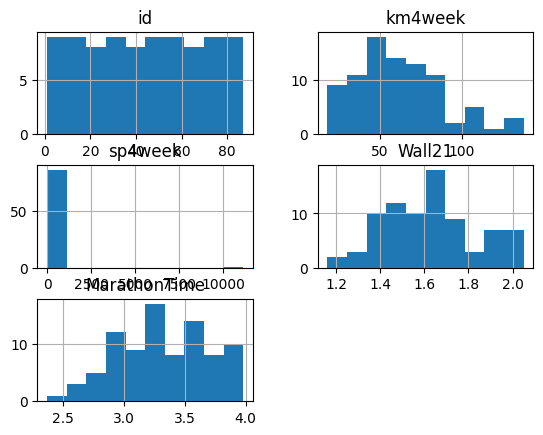

In [ ]:
datos_maraton.hist() #histograma

**Eliminare las columnas que en este caso no son necesarias para la prediccion**

In [ ]:
datos_maraton = datos_maraton.drop(columns= ['Name', 'id', 'Marathon', 'CATEGORY'])
datos_maraton  #imprimimos para ver como quedo

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


Observamos si hay valores nulos o datos faltantes.

In [ ]:
datos_maraton.isna().sum()

,0
Category,6
km4week,0
sp4week,0
CrossTraining,74
Wall21,6
MarathonTime,0


Podemos rellenar con ceroz a los datos faltantes

In [ ]:
datos_maraton['CrossTraining'] = datos_maraton['CrossTraining'].fillna(0) #en este caso rellenamos con 0 la columna crossTraining
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


El resto de datos faltantes podemos eliminar las filas

In [ ]:
datos_maraton.isna().sum() #Verifico si ya no quedo ningun valor nulo

,0
Category,6
km4week,0
sp4week,0
CrossTraining,0
Wall21,6
MarathonTime,0


In [ ]:
datos_maraton = datos_maraton.dropna(how='any')
datos_maraton     #Elimino las filas con valores nulos que quedaron

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [ ]:
datos_maraton.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     object 
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     object 
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.4+ KB


Aun nos quedan 2 columnas con datos no numericos, entonces lo pasaremos a numerico (int)

In [ ]:
datos_maraton['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [ ]:
valores_cross = {"CrossTraining":  {'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
datos_maraton.replace(valores_cross, inplace=True)
datos_maraton

/tmp/ipython-input-18-4026590396.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_maraton.replace(valores_cross, inplace=True)
/tmp/ipython-input-18-4026590396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_maraton.replace(valores_cross, inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [ ]:
#hacemos lo mismo con la columna category, primero vemos los datos que tiene sin repetir con .unique
datos_maraton['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [ ]:
valores_categoria = {"Category":  {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5,'WAM':6}}
datos_maraton.replace(valores_categoria, inplace=True)
datos_maraton

/tmp/ipython-input-20-3545259159.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_maraton.replace(valores_categoria, inplace=True)
/tmp/ipython-input-20-3545259159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_maraton.replace(valores_categoria, inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


Analizare los datos mediante una grafica

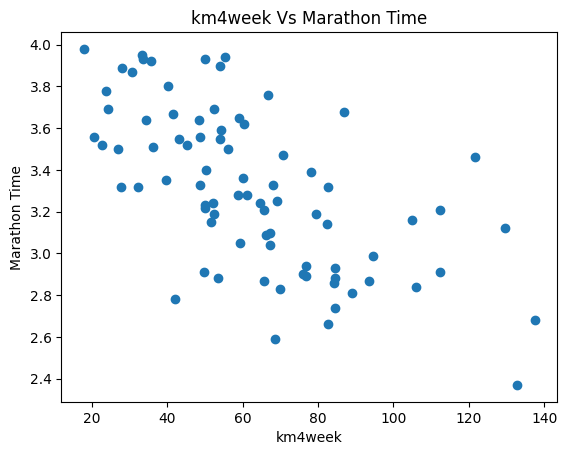

In [ ]:
plt.scatter(x= datos_maraton['km4week'], y=datos_maraton['MarathonTime'])
plt.title('km4week Vs Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()   #km4week vs marathon time, es decir tiempo corrido en la semana, y tiempo de meta de cada uno

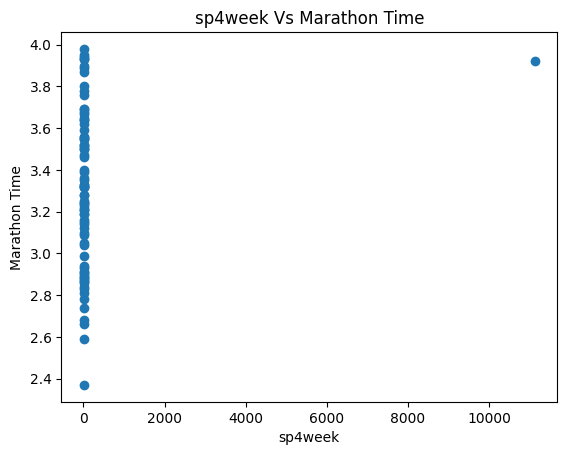

In [ ]:
plt.scatter(x = datos_maraton['sp4week'], y=datos_maraton['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()   #aca analizamos la velocidad en la que entrenaron esa semana (sp4week) vs marathon time

Al observar un "outlier" lo eliminamos para obtener una grafica mejor visualmente

In [ ]:
datos_maraton = datos_maraton.query('sp4week<1000') #aca decimos que tome velocidades (sp4week) menor a 1000

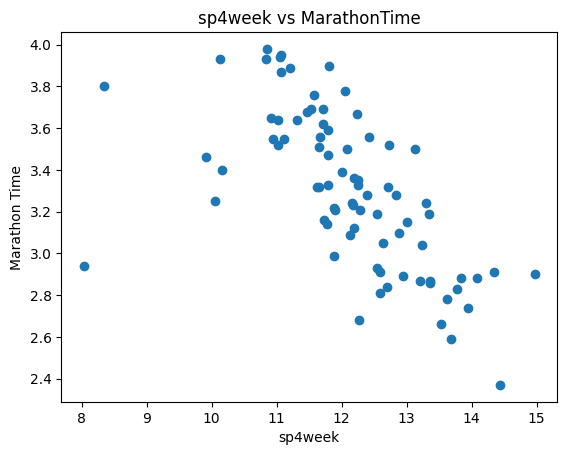

In [ ]:
plt.scatter(x = datos_maraton['sp4week'], y = datos_maraton['MarathonTime'])
plt.title('sp4week vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

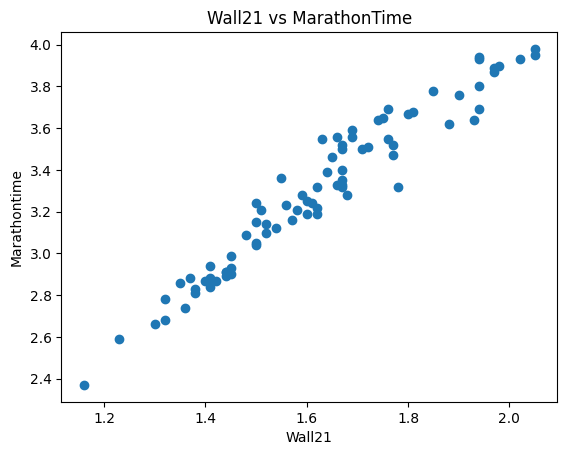

In [ ]:
plt.scatter(x= datos_maraton['Wall21'], y= datos_maraton['MarathonTime'])
plt.title('Wall21 vs MarathonTime')
plt.xlabel('Wall21')
plt.ylabel('Marathontime')
plt.show()

In [ ]:
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


**ETAPA 2. Entrenamiento del modelo**

Debemos separar los datos entre el 80% para el entrenamiento, y el test 20%

In [ ]:
datos_entrenamiento = datos_maraton.sample(frac= 0.8, random_state=0)
datos_test = datos_maraton.drop(datos_entrenamiento.index)

In [ ]:
datos_entrenamiento #obseramos como la tabla 'datos_entrenamiento' se quedo con el #80 de datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


In [ ]:
datos_test #y el data_test se quedo con el 20%

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
9,2,84.2,13.365079,0,1.35,2.86
12,2,53.5,14.078947,3,1.37,2.88
21,3,67.3,13.239344,0,1.50,3.04
26,6,129.6,12.188088,0,1.54,3.12
38,1,64.7,13.294521,0,1.50,3.24
39,6,69.2,10.053269,0,1.60,3.25
41,5,58.8,12.829091,0,1.68,3.28
46,6,48.6,12.252101,0,1.66,3.33
48,2,60.1,12.182432,0,1.55,3.36
49,1,78.2,12.000000,0,1.64,3.39


**Aca despegamos la columna MaratonTime de datos_entrenamiento y data_test, YA QUE MarathonTime sera la variable (Etiqueta) a predecir**

In [ ]:
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [ ]:
etiquetas_entrenamiento #Observamos que la etiqueta entrenamiento es la columna MarathonTime con el 80% de los datos, como los separamos.

,MarathonTime
54,3.47
28,3.15
31,3.19
84,3.94
47,3.35
...,...
55,3.50
20,2.99
79,3.90
8,2.83


In [ ]:
etiquetas_test #De la misma manera con la etiqueta test.

,MarathonTime
9,2.86
12,2.88
21,3.04
26,3.12
38,3.24
39,3.25
41,3.28
46,3.33
48,3.36
49,3.39


**Una vez separado los datos con sus respectivas etiquetas, entrenaremos el modelo con una regresion lineal simple**

In [ ]:
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression()

Etapa 3, usaremos el modelo entrenado y ejecutaremos las predicciones para datos_test que habia 'guardado'

In [ ]:
predicciones = modelo.predict(datos_test) #Aca metemos los datos_test al modelo entrenado
predicciones

array([2.79390706, 2.81599412, 3.05747527, 3.0497715 , 3.0601308 ,
       3.29473308, 3.36211907, 3.36226188, 3.17473152, 3.29138286,
       3.37757783, 3.5216523 , 3.5919168 , 3.55016407, 3.66416024,
       3.85281097])

**Ahora debo comparar los resultados anteriores que nos arrojo el modelo, con los valores reales del dato_test, y  ver el porcentaje de error que tiene**

In [ ]:
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual: %f" % (error*100))     #RMSE Multiplicado por 100, escala del error

Error porcentual: 11.030345


In [ ]:
error_porcentual = (error / etiquetas_test.mean()) * 100
print(f'Error porcentual real: {error_porcentual:.2f}%')
#Calcula un porcentaje de error aproximado diviendo el RMSE por el valor medio real

Error porcentual real: 3.27%


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
error_pct = mean_absolute_percentage_error(etiquetas_test, predicciones) * 100
print(f'Error porcentual: {error_pct:.2f}%')
      #Es el error porcentual real promedio MAPE, representativo para porcentajes.

Error porcentual: 2.86%


Una vez echo el modelo, podemos ingresar datos para que nos de una regresion segun lo entrenado.

In [ ]:
#usamos el modelo, con nuevo corredor, o sea nuevos datos

nuevo_corredor = pd.DataFrame(np.array([[1,400,15,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining', 'Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,15.0,0.0,1.4


In [ ]:
modelo.predict(nuevo_corredor)   #Esto  nos arrojara el resultado la columna a predecir segun los datos ingresados anteriormente

array([2.33246381])